# AllState Problem

In [2]:
# import packages: this submission mostly follow the kernel in the forum. I want to be more familiar with the basic steps
# and processes to do a regression problem.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
dataset = pd.read_csv("/Users/suruisun/Downloads/2016_Fall/allstate_kaggle/train.csv") 
dataset_test = pd.read_csv("/Users/suruisun/Downloads/2016_Fall/allstate_kaggle/test.csv")
ID = dataset_test['id']

In [33]:
dataset.drop('id',axis=1,inplace=True)
dataset_test.drop('id',axis=1,inplace=True)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None) # to make all rows and columns get printed without hiding
print(dataset.head(5))

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    B    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    A    A    A    A    A    B     B     A     A     A     A   
2    A    B    A    A    B    A    A    A    B     B     B     B     B     A   
3    B    B    A    B    A    A    A    A    B     A     A     A     A     A   
4    A    B    A    B    A    A    A    A    B     B     A     B     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     B     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     B     A     A     A   
4     A     A     A     A     A     A     A     A     B     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 

In [5]:
#print dataset_test.head(5)
# Size of the dataframe
print(dataset.shape)
# We can see that there are 188318 instances having 131 attributes(116 cat, 14 cont, 1 loss)

(188318, 131)


In [6]:
dataset.describe() # description for all continuous var
# there is no missing value, as count = 188318 for all cont variables

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [9]:
# Skewness of the distribution
dataset.skew()
# Values close to 0 show less skewness
# loss has the highest skew, let's visualize it

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

In [34]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots
#violin plot: combination of box plot and density plot

#range of features considered: 116 cat var
split = 116 

#number of features considered : 14+1
size = 15

#create a dataframe with only continuous features, including loss (the last variable)
data=dataset.iloc[:,split:] 

#get the names of all the columns
cols=data.columns  # cols are index
print cols.values # cols.values is a list


['cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont6' 'cont7' 'cont8' 'cont9'
 'cont10' 'cont11' 'cont12' 'cont13' 'cont14' 'loss']


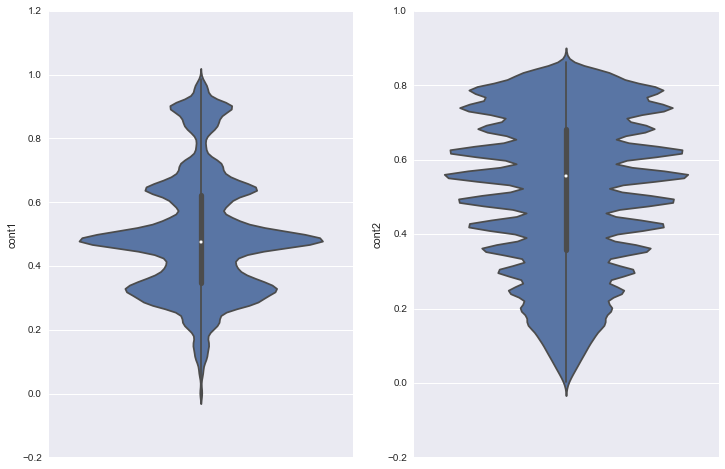

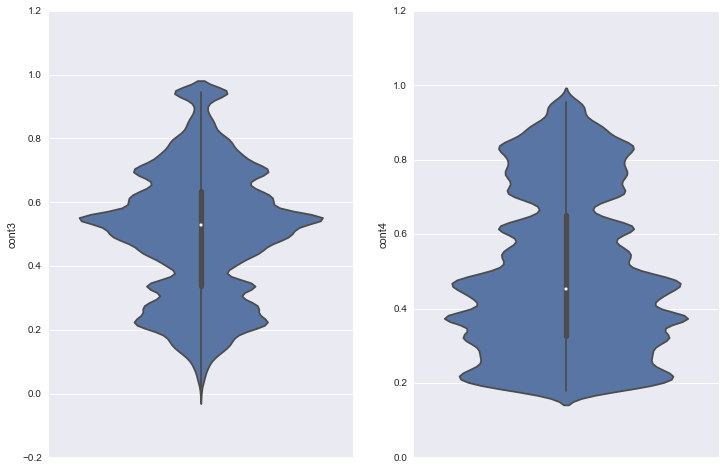

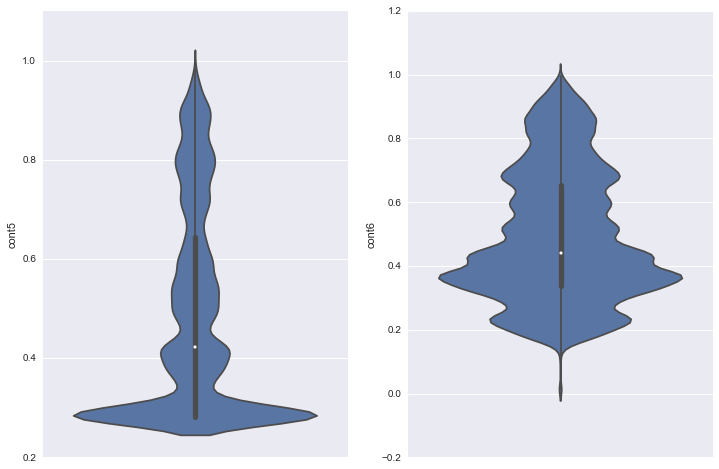

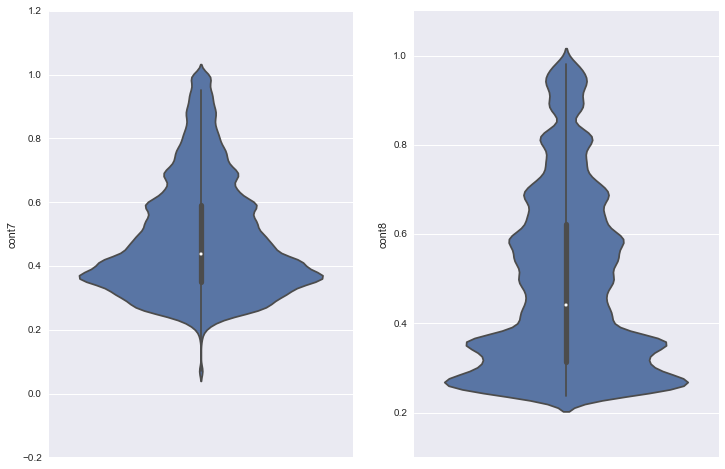

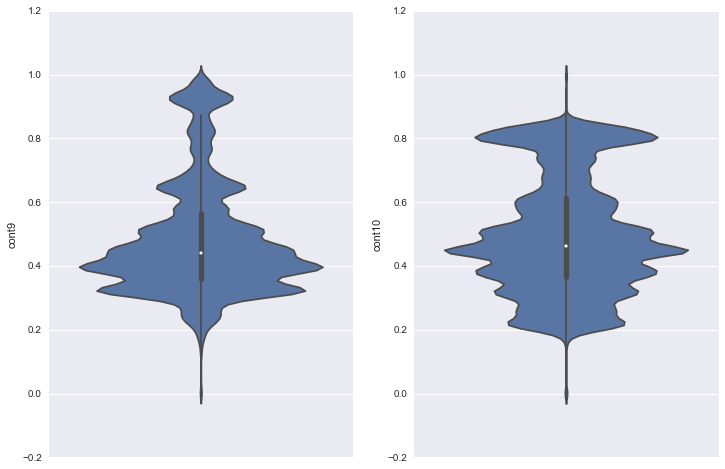

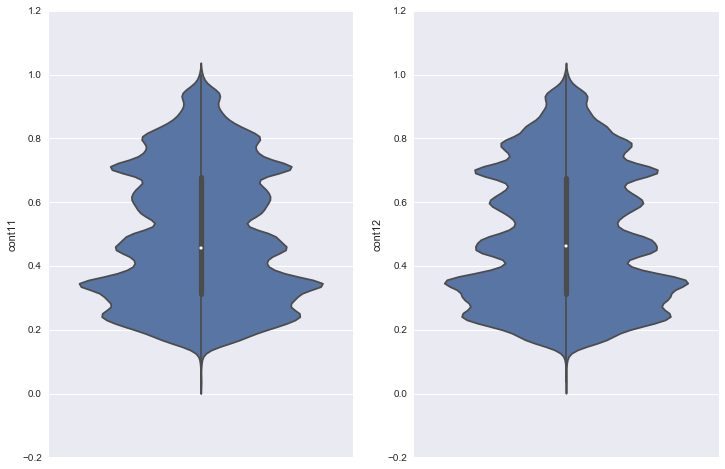

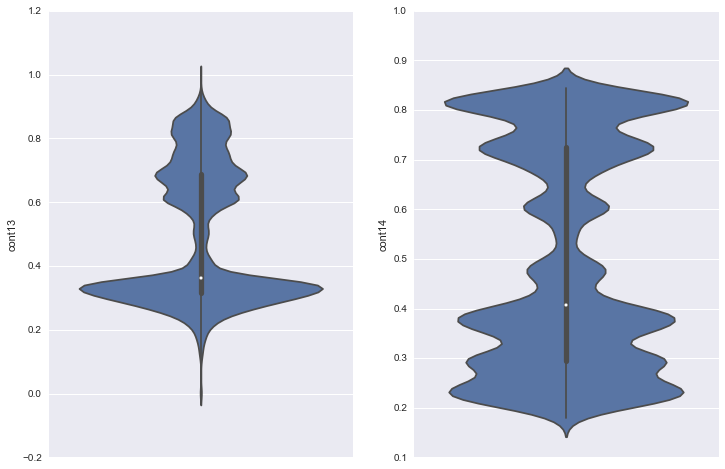

In [11]:
#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7


for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j],data=dataset,ax=ax[j])


#cont1 has many values close to 0.5
#cont2 has a pattern where there a several spikes at specific points
#cont5 has many values near 0.3
#cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration
#loss distribution must be converted to normal

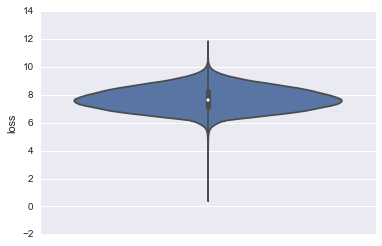

In [35]:
#log1p function applies log(1+x) to all elements of the column
dataset['loss'] = np.log1p(dataset['loss'])
sns.violinplot(data=dataset,y='loss')
plt.show()
#Plot shows that skew is corrected to a large extent

In [13]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()
print data_corr

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

In [14]:
# only show corr where it is more significant than threshold
threshold = 0.6
corr_list = []

for i in range(0,size):
    for j in range(i+1,size):
        if (data_corr.iloc[i,j] >= threshold) or (data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) # correlation and columns index

corr_list

[[0.75831531643666994, 0, 5],
 [0.92991170576166049, 0, 8],
 [0.80855086943336496, 0, 9],
 [0.61422545467275957, 0, 11],
 [0.65891829680915648, 5, 6],
 [0.79754351899466136, 5, 8],
 [0.88335050684903871, 5, 9],
 [0.77374545355183644, 5, 10],
 [0.78514397243737277, 5, 11],
 [0.81509107652085133, 5, 12],
 [0.74710791678856836, 6, 10],
 [0.74271226325000417, 6, 11],
 [0.78569679149602867, 8, 9],
 [0.60800046981123412, 8, 10],
 [0.62665643732725684, 8, 11],
 [0.64202769488824551, 8, 12],
 [0.70289554350783912, 9, 10],
 [0.71381193326514636, 9, 11],
 [0.7078763931019546, 9, 12],
 [0.99438411002154259, 10, 11]]

In [15]:
#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))
    

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61


[[0.99438411002154259, 10, 11], [0.92991170576166049, 0, 8], [0.88335050684903871, 5, 9], [0.81509107652085133, 5, 12], [0.80855086943336496, 0, 9], [0.79754351899466136, 5, 8], [0.78569679149602867, 8, 9], [0.78514397243737277, 5, 11], [0.77374545355183644, 5, 10], [0.75831531643666994, 0, 5], [0.74710791678856836, 6, 10], [0.74271226325000417, 6, 11], [0.71381193326514636, 9, 11], [0.7078763931019546, 9, 12], [0.70289554350783912, 9, 10], [0.65891829680915648, 5, 6], [0.64202769488824551, 8, 12], [0.62665643732725684, 8, 11], [0.61422545467275957, 0, 11], [0.60800046981123412, 8, 10]]


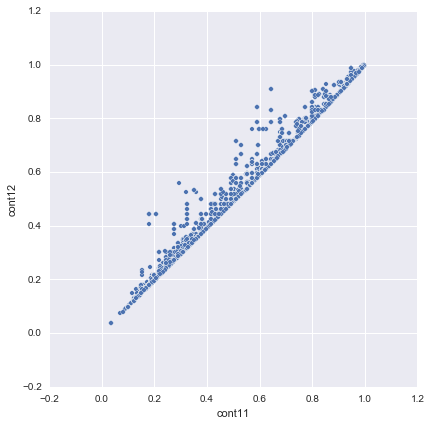

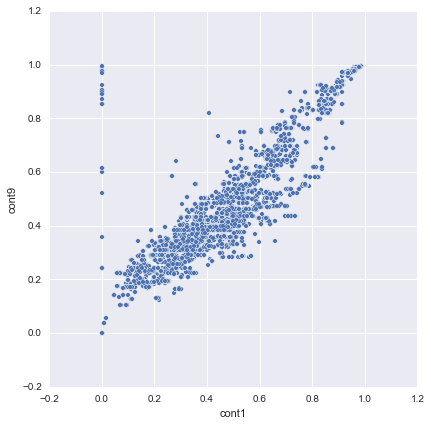

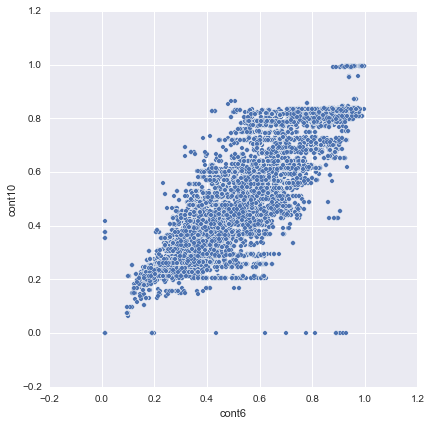

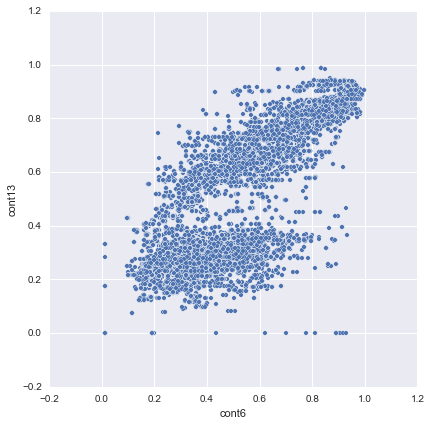

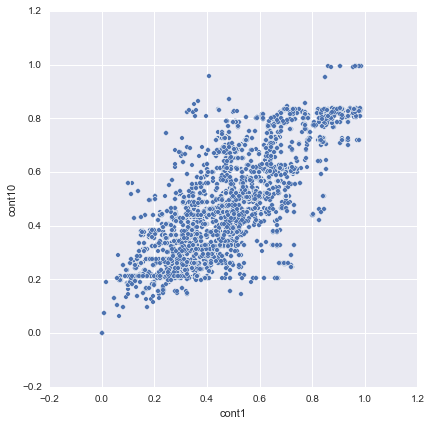

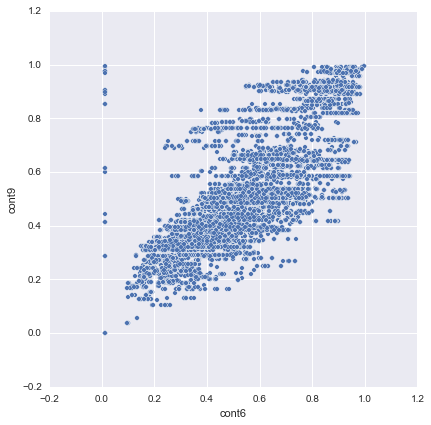

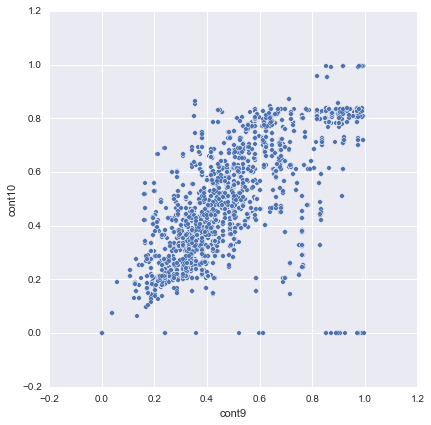

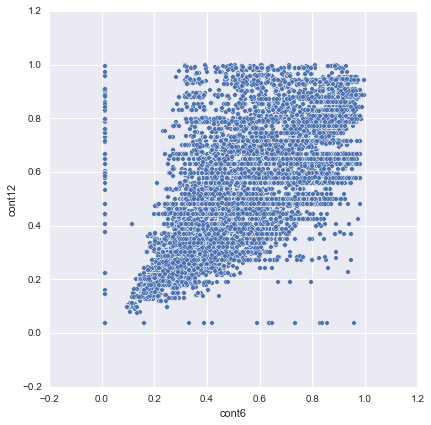

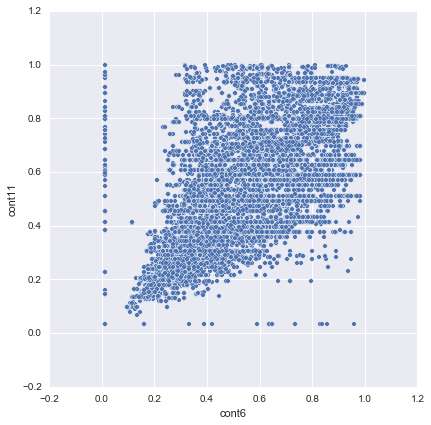

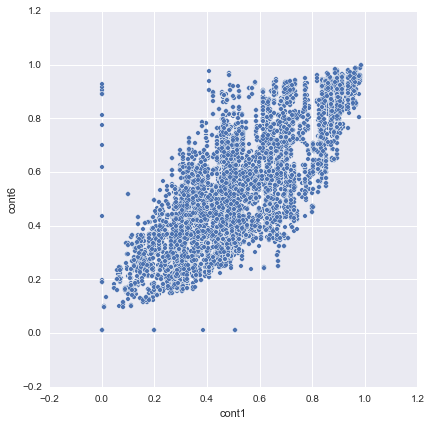

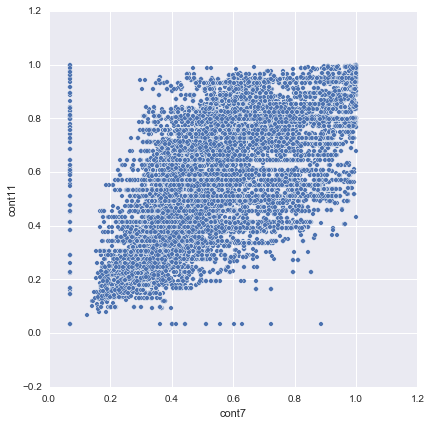

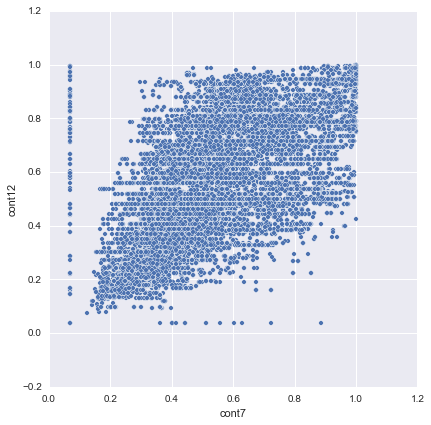

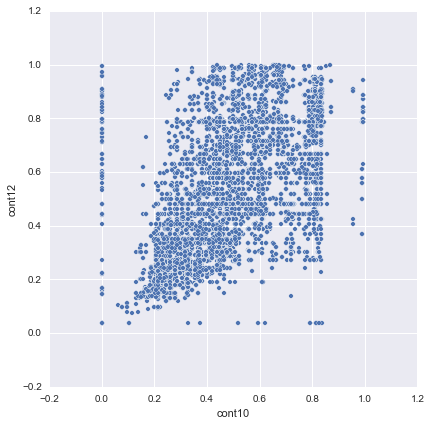

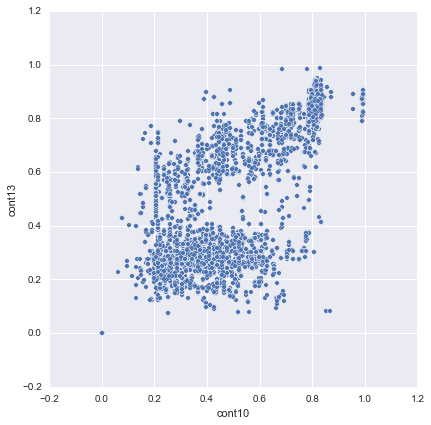

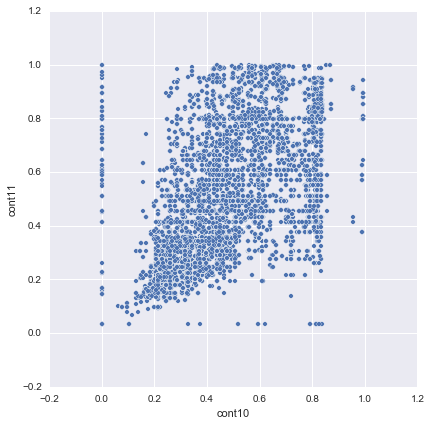

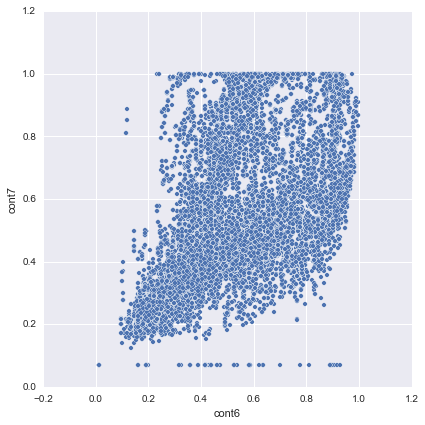

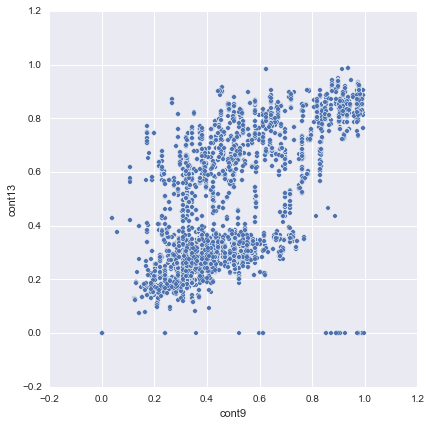

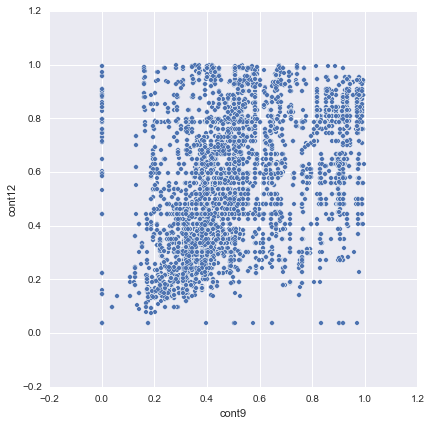

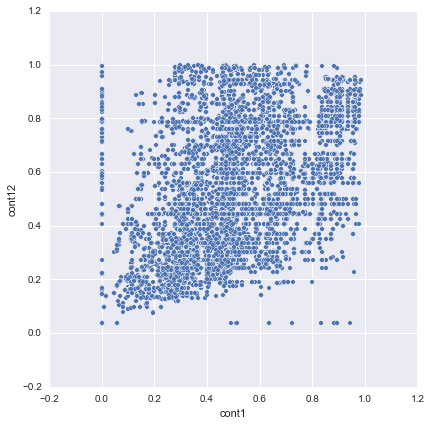

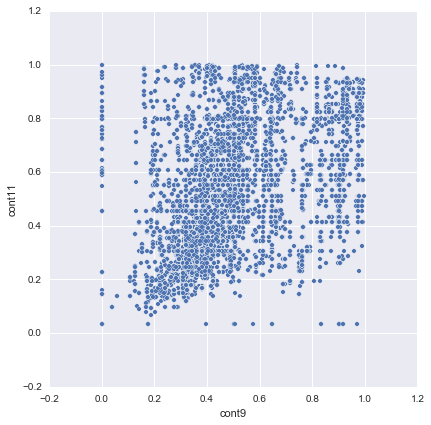

In [16]:
print s_corr_list
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j])
    plt.show()
#cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too

In [37]:
# Count of each label in each category

#names of all the columns
cols = dataset.columns
print cols.values



['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18' 'cat19'
 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27' 'cat28'
 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36' 'cat37'
 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45' 'cat46'
 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54' 'cat55'
 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63' 'cat64'
 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72' 'cat73'
 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81' 'cat82'
 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90' 'cat91'
 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99' 'cat100'
 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107' 'cat108'
 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115' 'cat116'
 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont6' 'c

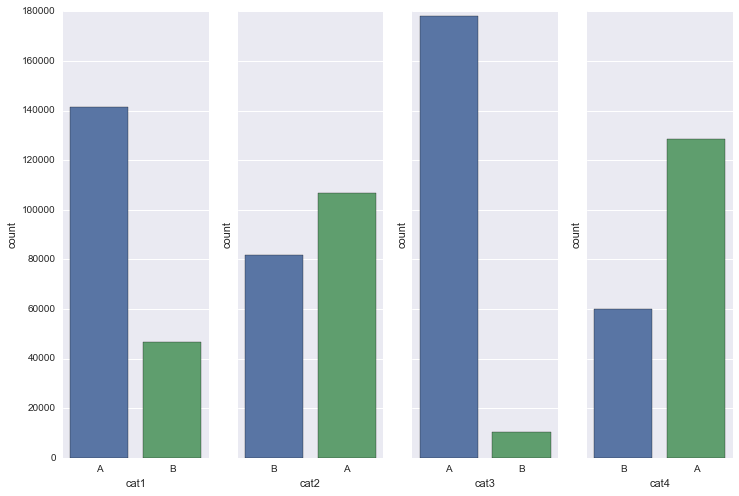

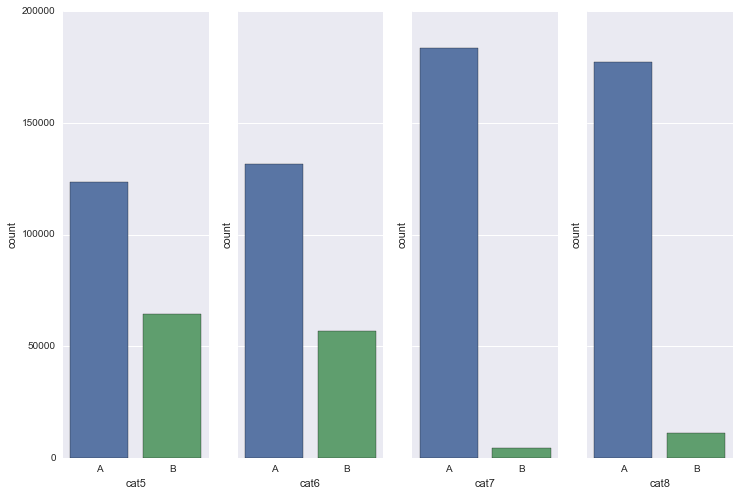

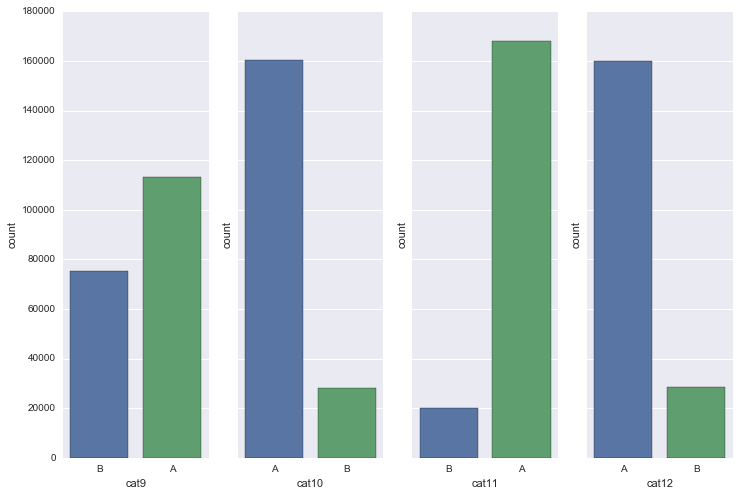

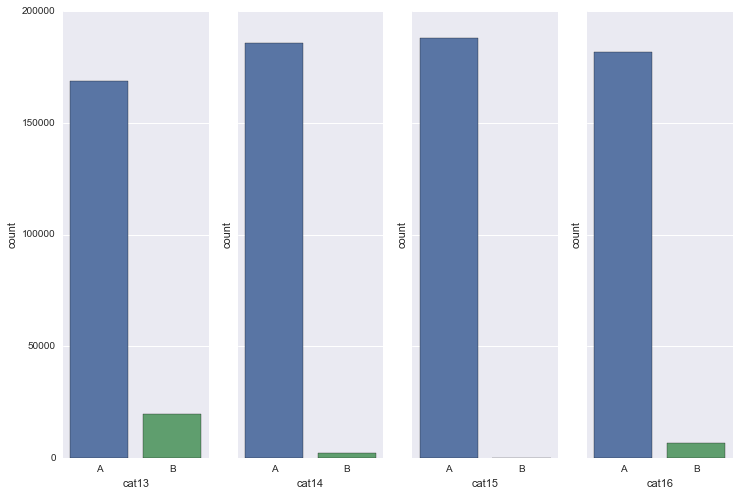

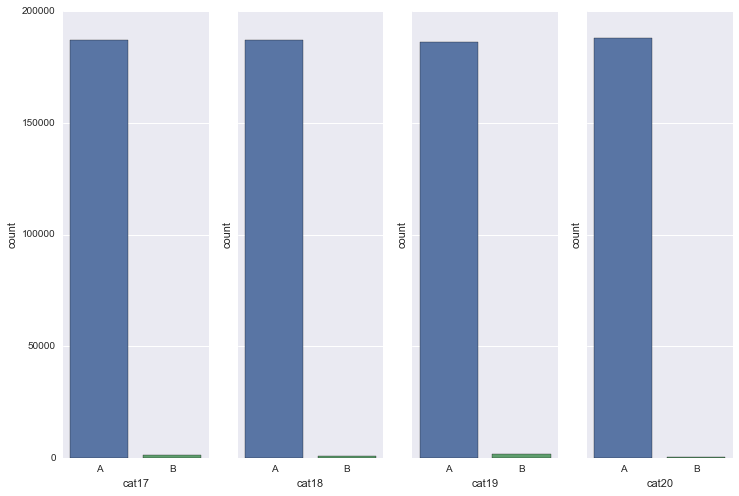

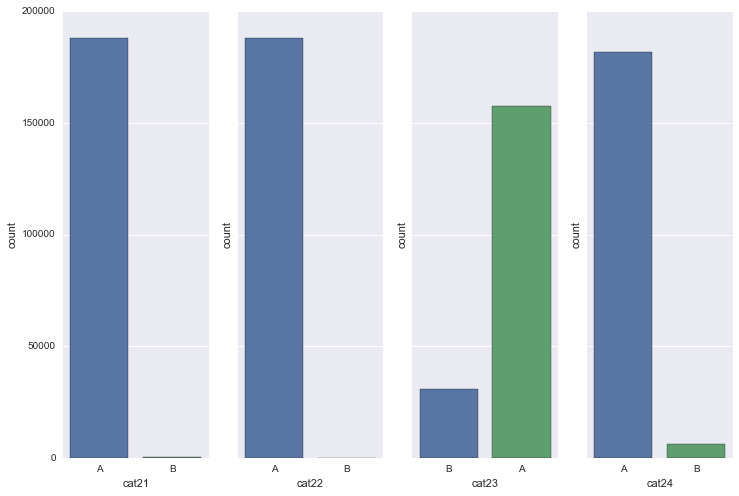

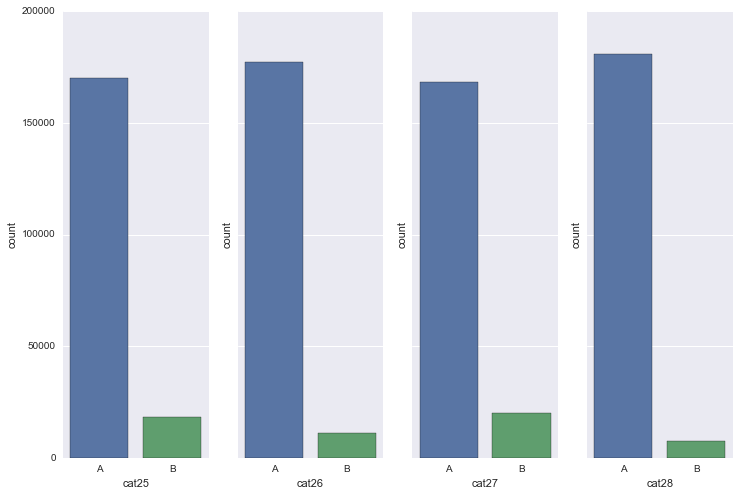

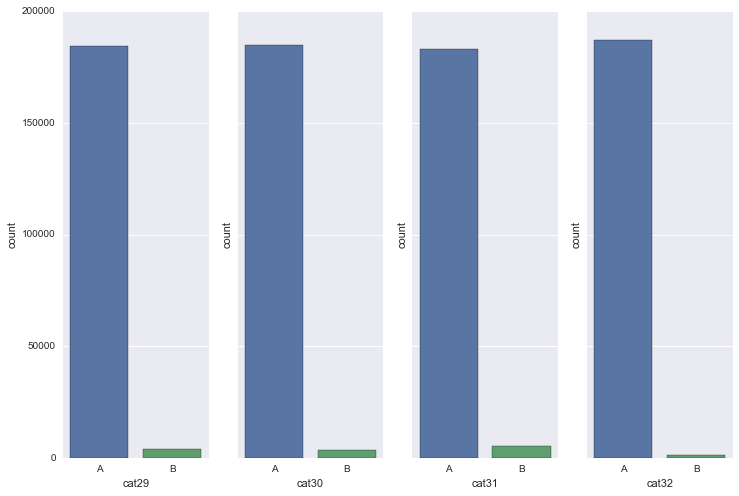

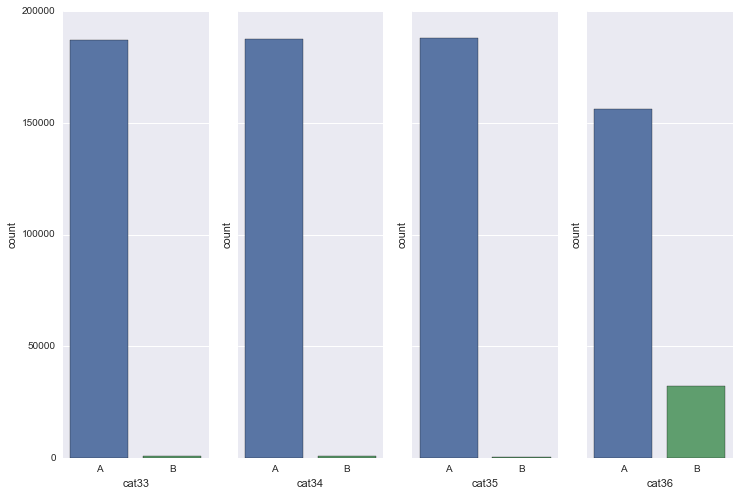

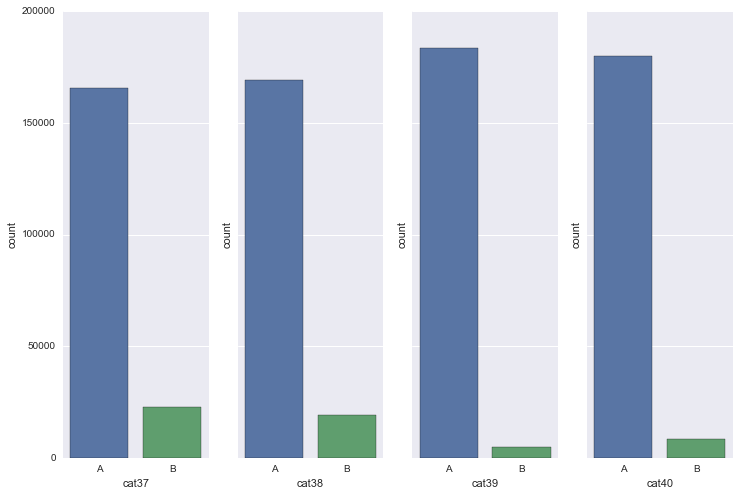

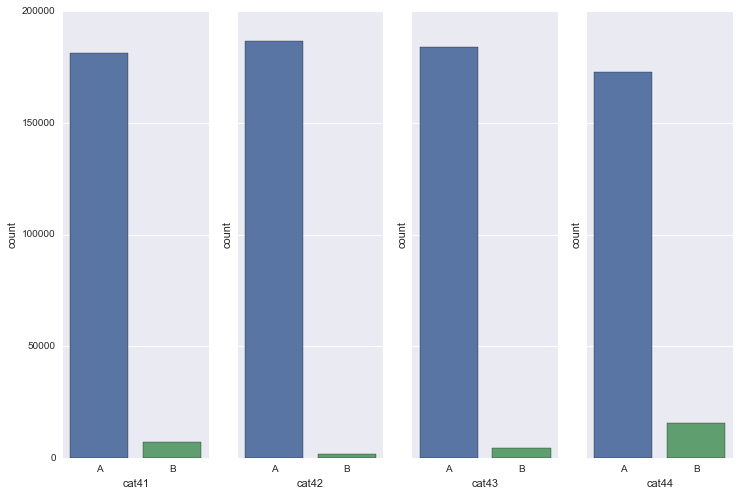

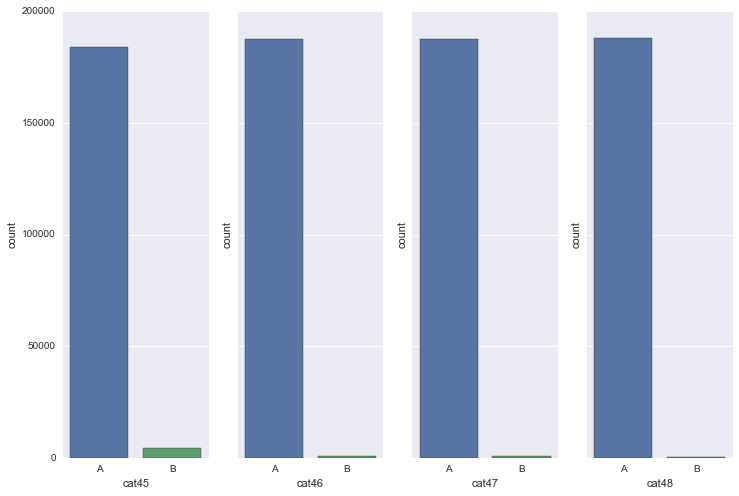

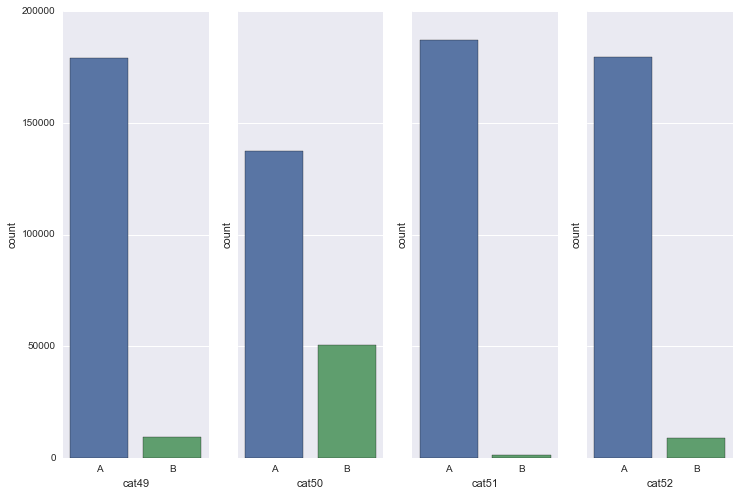

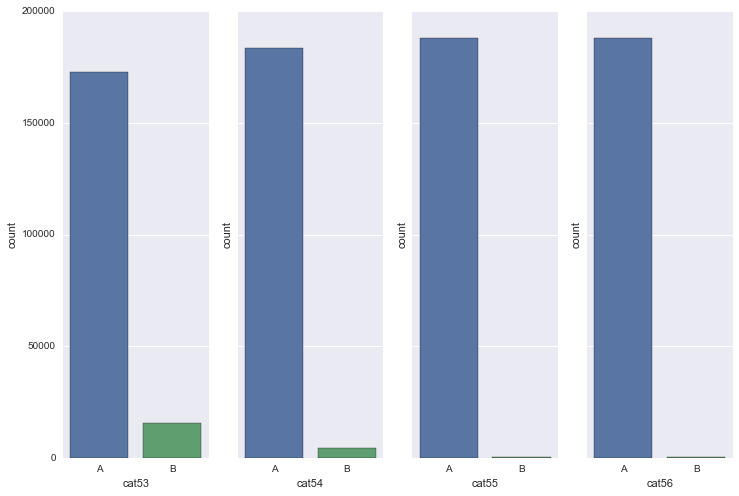

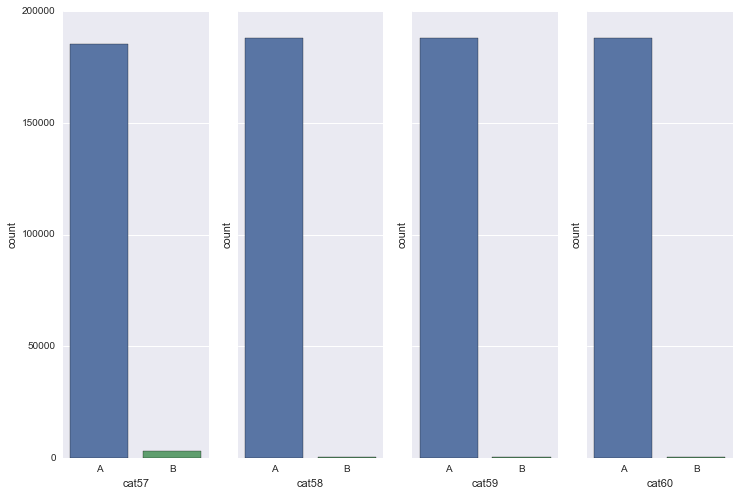

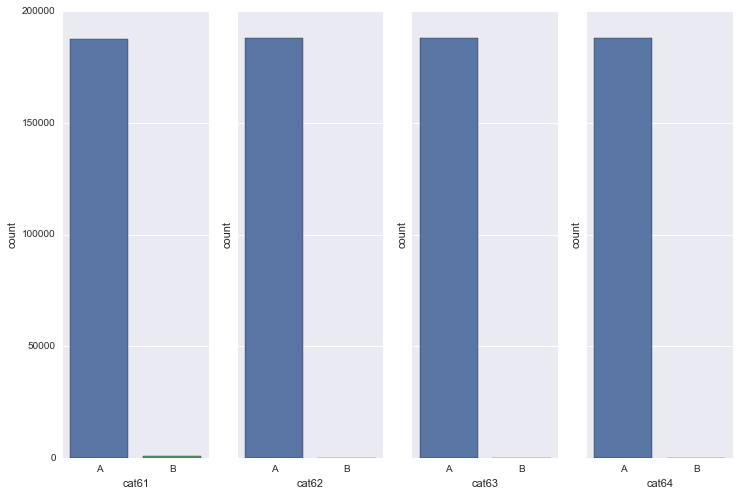

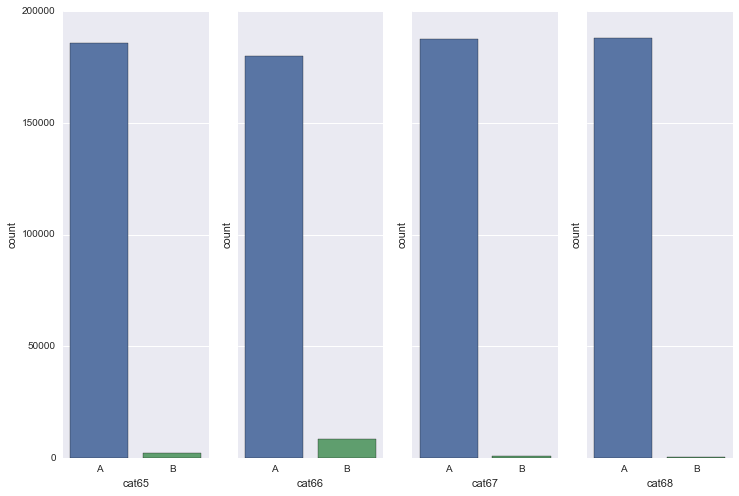

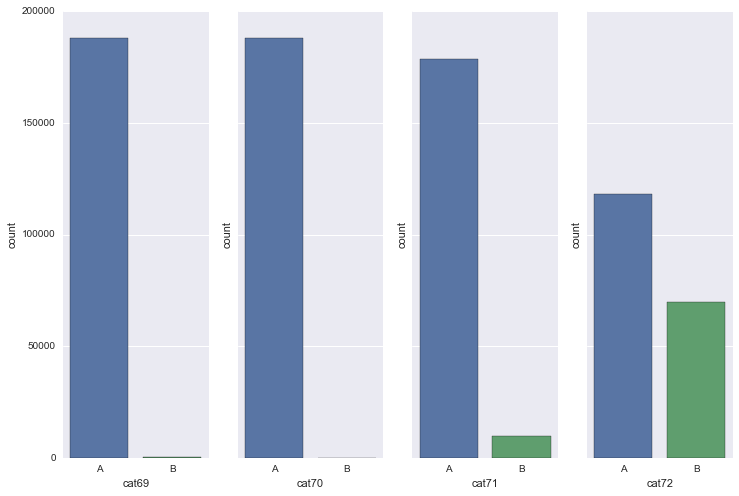

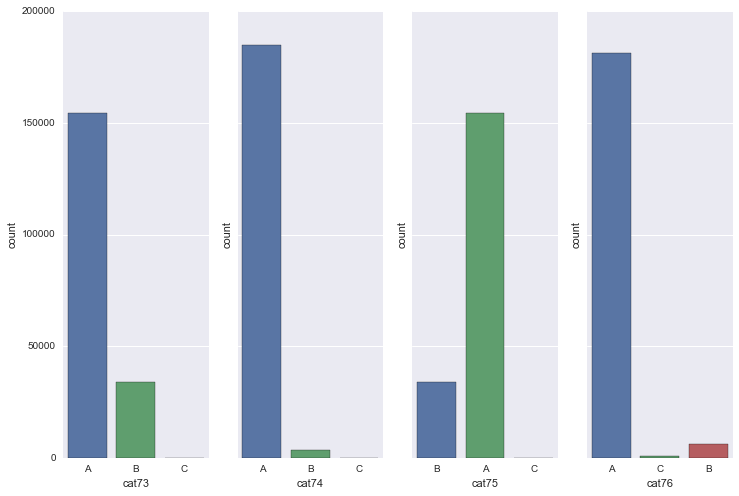

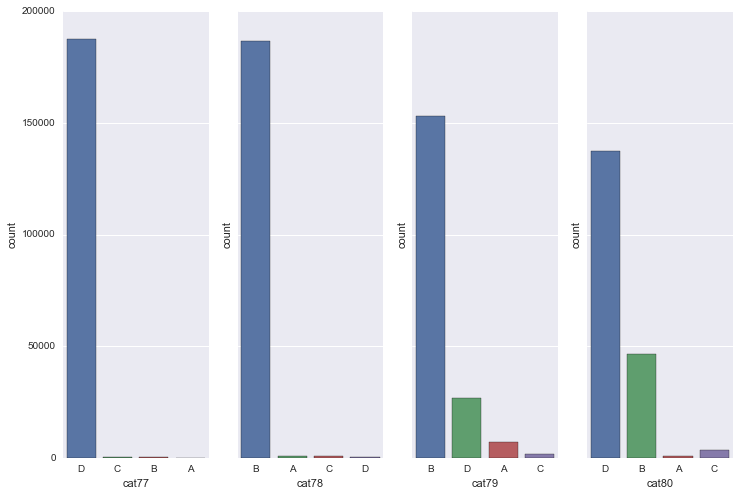

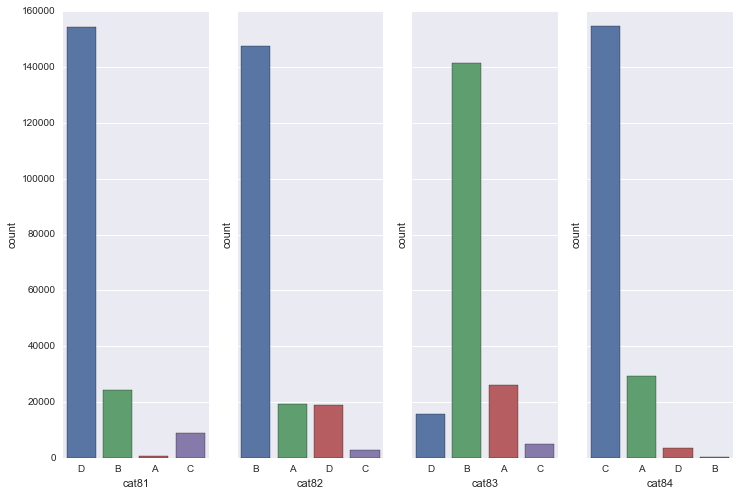

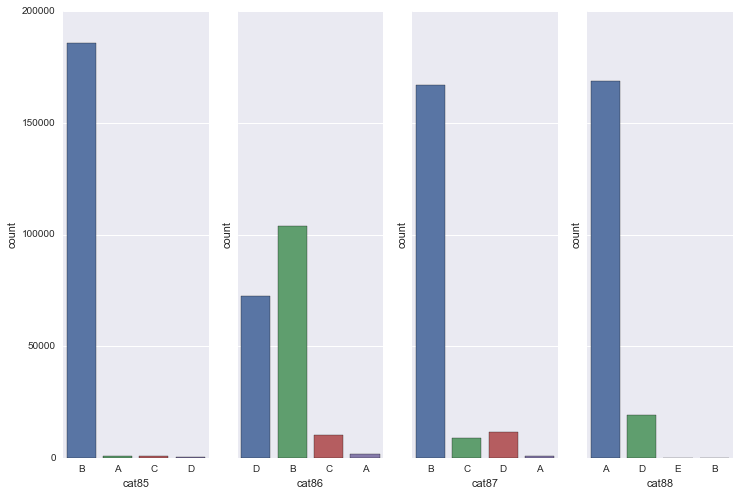

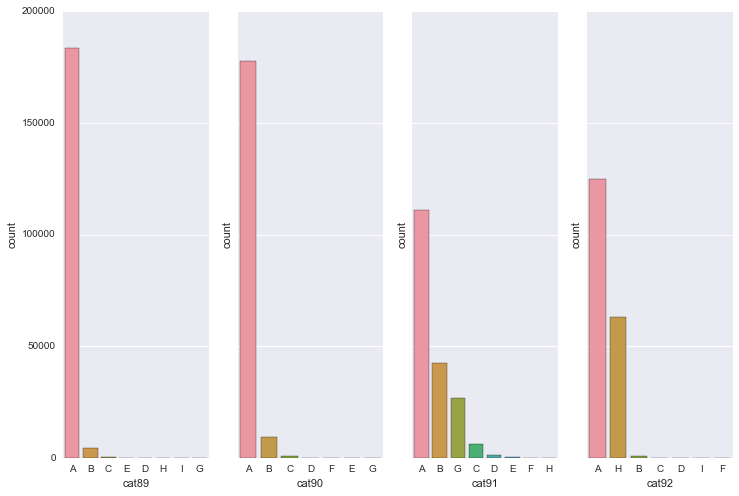

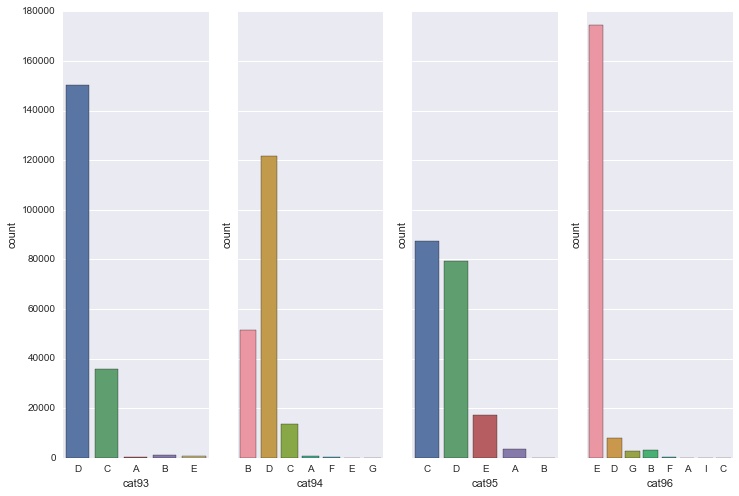

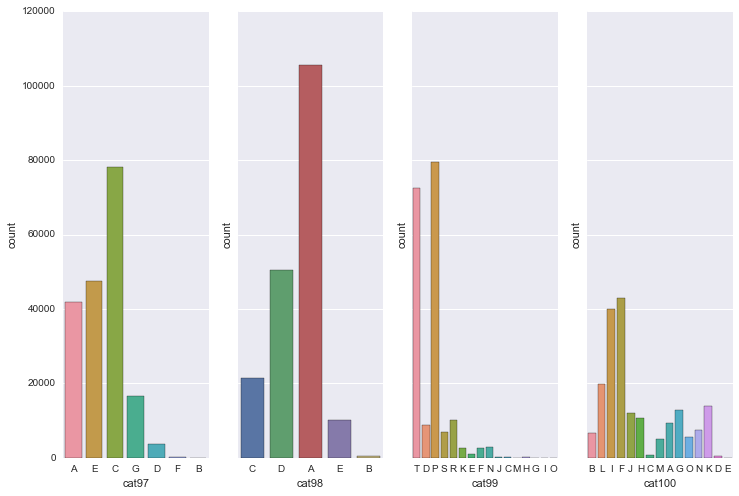

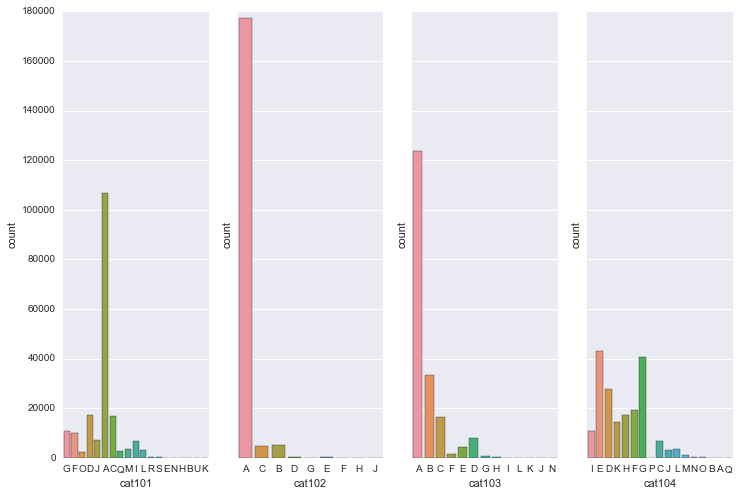

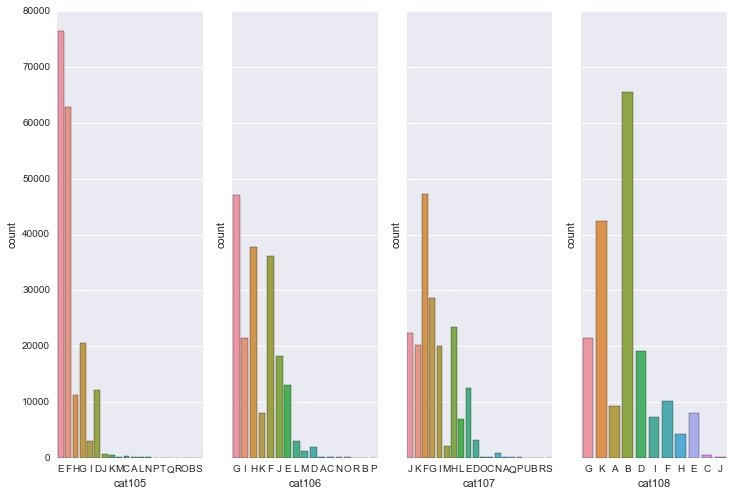

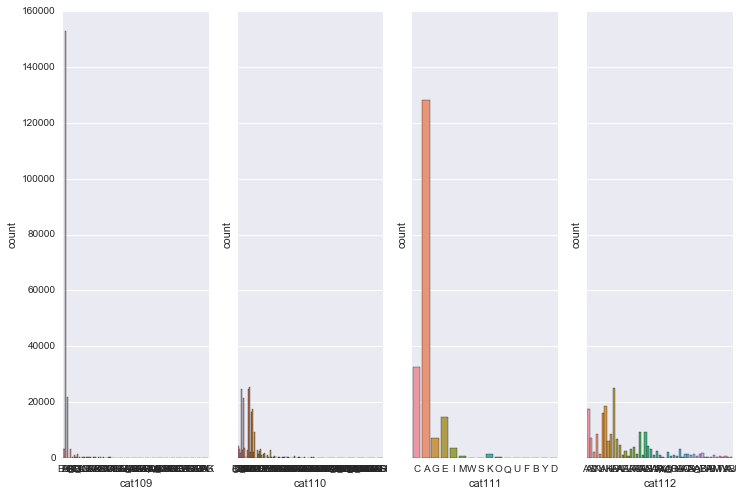

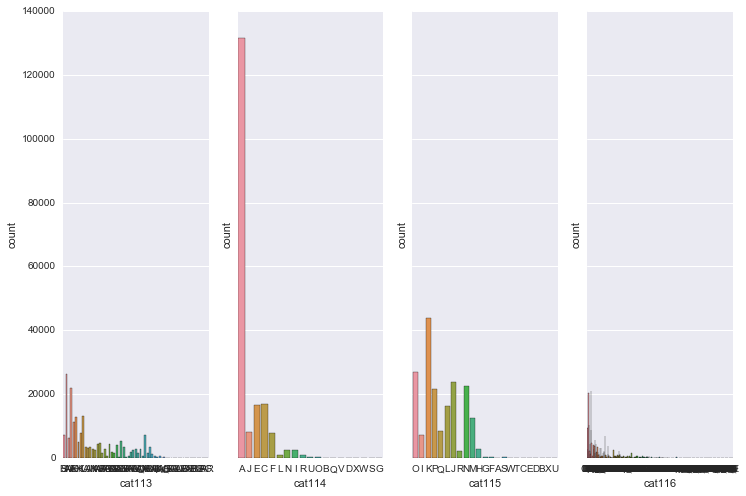

In [18]:
#Plot count plot for all attributes in a 29x4 = 116 grid
n_cols = 4
n_rows = 29

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12,8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j],data=dataset,ax=ax[j])


#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

In [38]:
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(split):
    train = dataset[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

In [39]:
labels[:3] # head of labels

[['A', 'B'], ['A', 'B'], ['A', 'B']]

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cats = []
for i in range(split):
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset.iloc[:,i])
    feature = feature.reshape(dataset.shape[0],1) # a single feature column 
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)
    
encoded_cats = np.column_stack(cats)

print(encoded_cats.shape)


(188318, 1176)


In [41]:
#Concatenate encoded attributes with continuous attributes
dataset_encoded = np.concatenate((encoded_cats,dataset.iloc[:,split:].values),axis=1) # .values become an array
# or pd.concat when the input is a data frame
print(dataset_encoded.shape)

(188318, 1191)


In [25]:
#pd.DataFrame(dataset_encoded).head()
#.drop(['cont11','cont1','cont6'],axis=1)

In [42]:
#get the number of rows and columns
r, c = dataset_encoded.shape  # dataset_encoded is a 2 dimentional array

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1): # the last element is loss
    i_cols.append(i)

#Y is the target column, X has the rest
X = dataset_encoded[:,0:(c-1)] # if using matrix, directly use number subsetting
Y = dataset_encoded[:,(c-1)] # Y is loss after log1p transform

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

In [28]:
#X_all

# Regression Methods

In [ ]:
# LinearRegression, Ridge, Lasso, ElasticNet, KNeighborRegression, RandomForestRegression, CART, DecisionTreeRegression ,
# xgboostRegresson etc...

In [35]:
#range(1,11,1)/np.repeat(10.0,10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [39]:
#Evaluation of various combinations of Ridge LinearRegression
#Import the library
from sklearn.linear_model import Ridge

#Add the alpha value to the below list if you want to run the algo
a_list = range(1,11,1)/np.repeat(10.0,10)
# np.logspace(-1,1,10)

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list]))) 
        # because we use log1p transform before
        
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha ) 

All 1273.36888083
All 1271.81984524
All 1270.67858843
All 1269.89773988
All 1269.44008811
All 1269.00765316
All 1268.60192484
All 1268.22216201
All 1267.8680931
All 1267.53699309


In [41]:
#np.logspace(-1,1,10)
#comb
#mae
#Best estimated performance is 1267 with alpha=1

[1273.3688808347852,
 1271.8198452446297,
 1270.6785884340252,
 1269.8977398837869,
 1269.4400881060503,
 1269.0076531599059,
 1268.6019248427874,
 1268.2221620142595,
 1267.8680931016356,
 1267.5369930867573]

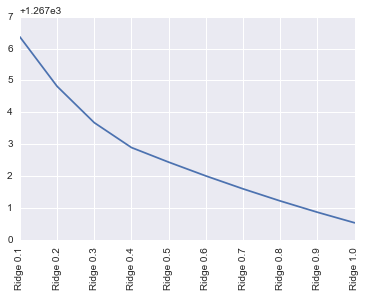

In [42]:
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

In [43]:
#Best Result obtained by running the algo for alpha=1.0    
best_mae = []
best_comb = []
best_mae.append(1267.5)
best_comb.append("Ridge" + " %s" % 1.0 )

In [44]:
print best_mae
print best_comb

[1267.5]
['Ridge 1.0']


In [45]:
#Evaluation of various combinations of LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
algo = "LR"
for name,i_cols_list in X_all:
    model.fit(X_train[:,i_cols_list],Y_train)
    result = mean_absolute_error(np.expm1(Y_val),np.expm1(model.predict(X_val[:,i_cols_list])))
    mae.append(result)
    print(name + " %s" % result)

comb.append(algo)


All1277.35669997


In [46]:
#MAE achieved is 1278
#Result obtained after running the algo. Comment the below two lines if you want to run the algo
best_mae.append(1278)
best_comb.append("LR")    



In [ ]:
plt.scatter()

[1267.5, 1278]
['Ridge 1.0', 'LR']


In [59]:
from sklearn.linear_model import Lasso
a_list = range(1,11,1)/np.repeat(10.0,10)
for alpha in a_list:
    model = Lasso(alpha=alpha,random_state=seed)
    algo = "Lasso"
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val),np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
    
    comb.append(algo + " %s" % alpha)

All 1678.73469187
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741
All 1809.10385741


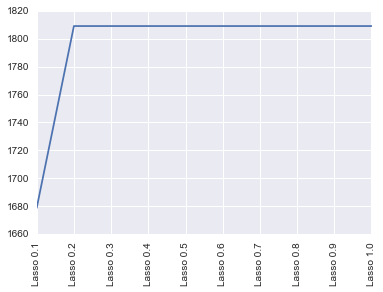

In [61]:
##Set figure size
fig,ax = plt.subplots()
plt.plot(mae[11:])
ax.set_xticks(range(10))
ax.set_xticklabels(comb[11:],rotation="vertical")
plt.show()


In [62]:
best_mae.append(1678.7)
best_comb.append("Lasso" + " %s" % 0.1)

In [65]:
#Evaluation of various combinations of ElasticNet LinearRegression
from sklearn.linear_model import ElasticNet
a_list = np.array([0.0001,0.001,0.01,0.1,0.5,1])
for alpha in a_list:
    model = ElasticNet(alpha=alpha,random_state=seed)
    algo = "ElasticNet"
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val),np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" %result)
    
    comb.append(algo + " %s" %alpha)
    

All 1258.54855642
All 1259.99030259
All 1293.05790269
All 1554.72630798
All 1809.10385741
All 1809.10385741


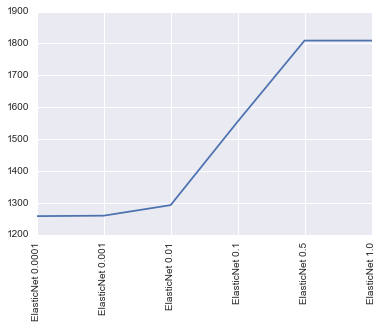

In [66]:

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae[21:])
##Set the tick names to names of combinations
ax.set_xticks(range(6))  # only 6 alpha values
ax.set_xticklabels(comb[21:],rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    


In [67]:
best_mae.append(1258.5)
best_comb.append("Elastic" + " %s" % 0.0001 )

In [68]:
print(best_mae)
print(best_comb)

[1267.5, 1278, 1678.7, 1258.5]
['Ridge 1.0', 'LR', 'Lasso 0.1', 'Elastic 0.0001']


In [69]:
print len(mae)
print len(comb)

27
27


In [ ]:
"""#Evaluation of various combinations of KNN
from sklearn.neighbors import KNeighborsRegressor
n_list = np.array([1,2,3,4,5,6,7,8,9,10]) #which takes so long to run, interrupted due to too much time
for n_neighbors in n_list:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    algo = "KNN"
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
comb.append(algo + " %s" % n_neighbors)"""

#Takes too much time to run

In [ ]:
"""##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae[27:])
##Set the tick names to names of combinations
ax.set_xticks(range(10))
ax.set_xticklabels(comb[27:],rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

#Very high computation time
#Best estimated performance is 1745 for n=1"""

In [ ]:
"""best_mae.append(1745)
best_comb.append("KNN" + " %s" % 1 )"""

In [24]:
#Evaluation of various combinations of CART
from sklearn.tree import DecisionTreeRegressor

#d_list =np.array([1,2,3,4,5,6])  # the depth of the tree
d_list = np.array([])

# basically I should have used the d_list to try, but due to lack of time just ignore here
if (len(d_list)==0):
    best_mae.append(1741)
    best_comb.append("CART" + " %s" % 5 )    

for max_depth in d_list:
    #Set the base model
    model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
    algo = "CART"
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % max_depth)

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#High computation time
#Best estimated performance is 1741 for depth=5

In [26]:
print(best_mae)
print(best_comb)

[1267.5, 1278, 1678.7, 1258.5, 1741]
['Ridge 1.0', 'LR', 'Lasso 0.1', 'Elastic 0.0001', 'CART 5']


In [ ]:
"""#Evaluation of various combinations of SVM
from sklearn.svm import SVR
#c_list = np.array([0.001,0.01,0.1,0.5,1])
c_list = np.array([1]) # change the C values in SVM
for C in c_list:
    model = SVR(C=C)
    algo = "SVM"
    for name, i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
    
    comb.append(algo + " %s" % C )
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very very high computation time"""

In [ ]:
#Evaluation of various combinations of Bagged Decision Trees

"""# bagging: sample with replacement, can have duplicated samples
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = BaggingRegressor(n_jobs=-1,n_estimators=n_estimators)
    
    algo = "Bag"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very high computation time"""

['Ridge 1.0', 'LR', 'Lasso 0.1', 'Elastic 0.0001', 'CART 5']

In [44]:
#Evaluation of various combinations of XGB
#Import the library
from xgboost import XGBRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([1000])

for n_estimators in n_list:
    #Set the base model
    model = XGBRegressor(n_estimators=n_estimators,seed=seed)
    
    algo = "XGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )



All 1168.79391021


In [47]:
best_mae.append(1168.8)
best_comb.append("XGB" + "%s" % 1000)

In [49]:
best_mae

[1267.5, 1278, 1678.7, 1258.5, 1741, 1168.8]

In [ ]:
"""if (len(n_list)==0):
    mae.append(1169)
    comb.append("XGB" + " %s" % 1000 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1169 with n=1000"""

In [50]:
# Make predictions using XGB as it gave the best estimated performance        
X = np.concatenate((X_train,X_val),axis=0)
Y = np.concatenate((Y_train,Y_val),axis=0)

n_estimators = 100 # 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)

#Read test dataset

#Drop unnecessary columns
#ID = dataset_test['id']
#dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)


#Concatenate encoded attributes with continuous attributes
X_test = np.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

#Make predictions using the best model
predictions = np.expm1(best_model.predict(X_test))
# Write submissions to output file in the correct format
with open("/Users/suruisun/Downloads/all_state_submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))